<a href="https://colab.research.google.com/github/aminsamir45/ML-Projects/blob/main/MNIST/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First import libraries needed to solve the problem
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import math
import pandas as pd
import random
import tensorflow as tf
import scipy.io
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
drive.mount('/content/drive')

Mounted at /content/drive


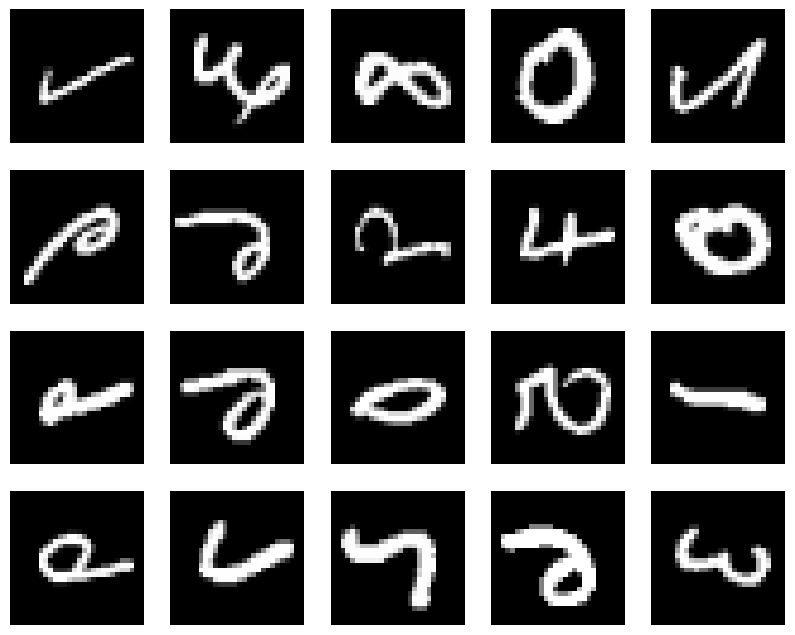

In [3]:
#Load the data
training = loadmat('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 3/mnist_training.mat')
testing = loadmat('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 3/mnist_test.mat')

# mess around with data
# Extract the images and labels
images = training['X_train']
labels = training['y_train']

# Plot the first 20 images
fig, axs = plt.subplots(4, 5, figsize=(10, 8))
for i in range(20):
    ax = axs[i // 5, i % 5]
    ax.imshow(images[i].reshape((28, 28)), cmap='gray')
    ax.axis('off')

plt.show()

In [4]:
# Reshape the vector into a matrix
image_reshape = training['X_train'][0].reshape((28, 28))
print(images[0].shape)
print(image_reshape.shape)

(784,)
(28, 28)


In [8]:
# training data
X_train = training['X_train']
y_train = training['y_train']
# testing data
X_test = testing['X_test']
y_test = testing['y_test']
# class mapping for one-hot coding
class_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9}
# Convert to one-hot encoding
y_train = np.vectorize(class_map.get)(y_train, 0)
y_test = np.vectorize(class_map.get)(y_test, 0)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model architecture
model = Sequential()
model.add(Dense(25, activation='sigmoid', input_shape=(784,), use_bias=True))
model.add(Dense(10, activation='sigmoid', use_bias=True))
# Define the optimizer
sgd = SGD(lr=0.1)
# Compile
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
# Train
history = model.fit(X_train, y_train, epochs=10000, batch_size=16, verbose=0, shuffle=True)
# Evaluate on the training set
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=16, verbose=1)
print(f'Training accuracy: {train_acc * 100:.2f}%')
# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=16, verbose=1)
# print('Test loss:', loss)
print(f'Test accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


188/188 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9890
Training accuracy: 98.90%
188/188 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.8897
Test accuracy: 88.97%
